Text(0.5, 1.0, 'Monthly variation return %')

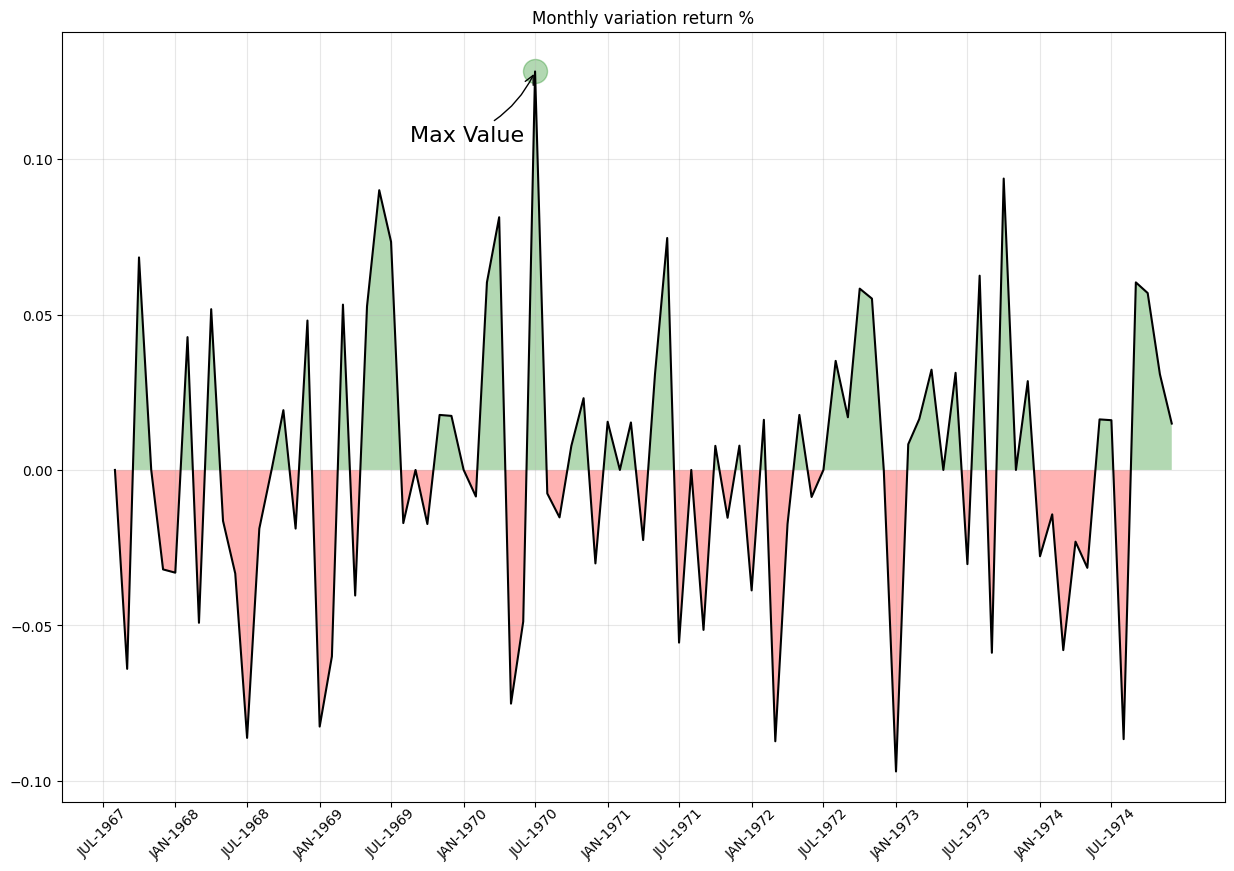

In [6]:
from imports import *
PATH = '../data/economics.csv'
df = pd.read_csv(PATH)

df['pce_monthly_change'] = (df['psavert'] - df['psavert'].shift(1))/df['psavert'].shift(1)

# convert todatetime
df['date_converted'] = pd.to_datetime(df['date'])

# filter our df for a specific date
df = df[df['date_converted'] < np.datetime64('1975-01-01')]

# separate x and y
x = df['date_converted']
y = df['pce_monthly_change']

# calculate the max values to annotate on the plot
y_max = y.max()

# find the index of the max value
x_ind = np.where(y == y_max)

# find the x based on the index of max
x_max = x.iloc[x_ind]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

ax.plot(x, y, color='black')
ax.scatter(x_max, y_max, s = 300, color ='green', alpha=0.3)

# annotate the text of the Max value
ax.annotate(r'Max Value',
            xy=(x_max, y_max),
            xytext=(-90, -50),
            textcoords='offset points',
            fontsize=16,
            arrowprops=dict(arrowstyle='->', connectionstyle = 'arc3, rad=.2'))

ax.fill_between(x, 0, y, where = 0 > y, facecolor='red', interpolate=True, alpha=0.3)
ax.fill_between(x, 0, y, where = 0 <= y, facecolor = 'green', interpolate=True, alpha = 0.3)

ax.set_ylim(y.min() * 1.1, y.max() * 1.1)

xtickvals = [str(m)[:3].upper() + '-' + str(y) for y, m in zip(df.date_converted.dt.year, df.date_converted.dt.month_name())]

# this way we can set the ticks to be every 6 months.
ax.set_xticks(x[::6])

ax.set_xticklabels(xtickvals[::6], rotation=45, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

# add a grid
ax.grid(alpha = 0.3)

# set the title
ax.set_title('Monthly variation return %')